<a href="https://colab.research.google.com/github/Elvin100s/Formative3_Group-20_Assignment/blob/master/Part1_Probability_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import urllib.request

#1. Load Iris dataset from UCI Repository

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
raw_data = urllib.request.urlopen(url)
# genfromtxt handles the CSV format and encoding
data = np.genfromtxt(raw_data, delimiter=',', dtype=None, encoding=None)

Extracting first two features: Sepal Length and Sepal Width (2D data)

In [3]:
X = np.array([[row[0], row[1]] for row in data if len(row) > 0])


# --- MANUAL STATISTICAL CALCULATIONS ---

In [4]:
# Calculating the Mean Vector [E(x), E(y)]
mu = np.mean(X, axis=0)

Manually computing the Covariance Matrix Σ

In [5]:
# Formula: Σ = [Σ(x_i - mu)(x_i - mu)^T] / (n-1)
n = X.shape[0]
cov = np.zeros((2, 2))

for x in X:
    diff = x - mu
    cov += np.outer(diff, diff)

cov = cov / (n - 1)

In [6]:
# Manually computing the Determinant for a 2x2 matrix: (ad - bc)
det = cov[0,0]*cov[1,1] - cov[0,1]*cov[1,0]
# Manually computing the Inverse Covariance Matrix (Σ^-1)
# Formula: (1/det) * [[d, -b], [-c, a]]
inv_cov = (1/det) * np.array([
    [cov[1,1], -cov[0,1]],
    [-cov[1,0], cov[0,0]]
])


#Calculates the PDF value for a single 2D point using matrix operations.

In [7]:

def bivariate_pdf(x, mu, inv_cov, det):
    diff = x - mu
    # Matrix multiplication for the exponent term
    exponent = -0.5 * diff.T @ inv_cov @ diff
    return (1 / (2 * np.pi * np.sqrt(det))) * np.exp(exponent)


Generate PDF values for our actual data points

In [8]:
pdf_values = np.array([bivariate_pdf(x, mu, inv_cov, det) for x in X])

print("First 5 PDF values:")
print(pdf_values[:5])

First 5 PDF values:
[0.1923277  0.22585764 0.1689405  0.14420801 0.13629668]


# --- PREPARING VISUALIZATION GRID ---

In [9]:
# Define the range of the plot based on data min/max
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()

# Create 100x100 grid for smooth contours
x_grid = np.linspace(x_min, x_max, 100)
y_grid = np.linspace(y_min, y_max, 100)

Xg, Yg = np.meshgrid(x_grid, y_grid)
Z = np.zeros_like(Xg)

# Evaluate the PDF at every coordinate on the grid
for i in range(Xg.shape[0]):
    for j in range(Xg.shape[1]):
        point = np.array([Xg[i,j], Yg[i,j]])
        Z[i,j] = bivariate_pdf(point, mu, inv_cov, det)



# --- 2D CONTOUR PLOT ---

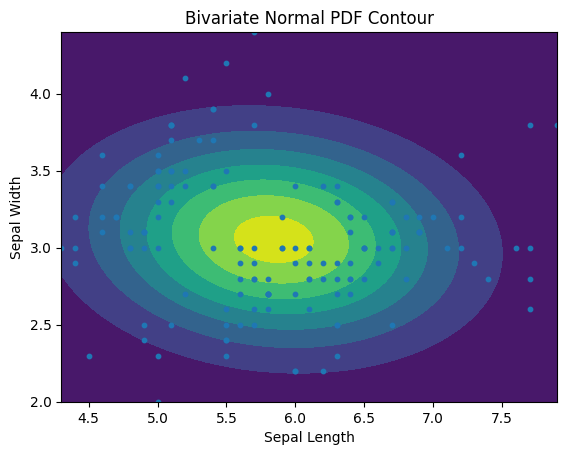

In [10]:
plt.figure()
plt.contourf(Xg, Yg, Z)
plt.scatter(X[:,0], X[:,1], s=10)
plt.title("Bivariate Normal PDF Contour")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# --- 3D SURFACE PLOT ---

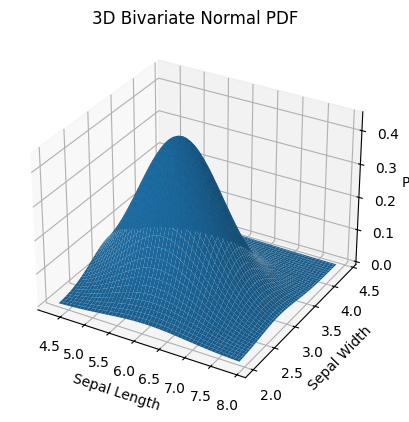

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Z)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("PDF")
plt.title("3D Bivariate Normal PDF")
plt.show()